# Rap Artists

The data this week comes from [BBC Music](http://www.bbc.com/culture/story/20191007-the-greatest-hip-hop-songs-of-all-time-who-voted) by way of [Simon Jockers at Datawrapper](https://blog.datawrapper.de/best-hip-hop-songs-of-all-time-visualized/).

The raw data can be found on his [Github](https://github.com/sjockers/bbc-best-rapmusic). Album covers were retrived from Spotify, and you can access them via the Spotify API.

> Earlier this year, BBC Music asked more than 100 critics, artists, and other music industry folks from 15 countries for their five favorite hip-hop tracks. Then they broke down the results of the poll into one definitive list. But BBC Music didn’t just publish a best-of list, they also published the complete poll results and a description of the simple algorithm they ranked the songs with. - Simon Jockers

> We awarded 10 points for first ranked track, eight points for second ranked track, and so on down to two points for fifth place. The song with the most points won. We split ties by the total number of votes: songs with more votes ranked higher. Any ties remaining after this were split by first place votes, followed by second place votes and so on: songs with more critics placing them at higher up the lists up ranked higher. -- BBC Music

### Data Dictionary

# `polls.csv`

|variable        |class     |description |
|:---------------|:---------|:-----------|
|rank            |double    | Rank given by voter (1-5) |
|title           |character | Title of song|
|artist          |character | Artist |
|gender          |character | Gender of artist |
|year            |double    | Year song released |
|critic_name     |character | Name of critic|
|critic_rols     |character | Critic's role |
|critic_country  |character | Critic's primary country|
|critic_country2 |character | Critic's secondary country |

# `rankings.csv`

|variable |class     |description |
|:--------|:---------|:-----------|
|ID       |double    |ID of song |
|title    |character | Title of song  |
|artist   |character | Artist's name |
|year     |double    | Year song released |
|gender   |character | Gender of artist/group |
|points   |double    | Total points awarded |
|n        |double    |Total votes (regardless of position) |
|n1       |double    | Number of votes as #1 |
|n2       |double    |Number of votes as #2 |
|n3       |double    |Number of votes as #3 |
|n4       |double    |Number of votes as #4 |
|n5       |double    |Number of votes as #5 |

## The mandatory first step to import these 3 libraries whether or not you are planning to use them or not

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

polls = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-14/polls.csv')
ranking = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-14/rankings.csv')

## Working with ranking.csv file
### Finding favourite artist gender

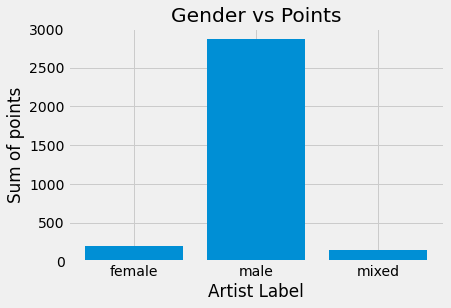

In [138]:
plt.style.use("fivethirtyeight")

gender = ranking.groupby(['gender'])['points'].sum().index.to_list()
points = ranking.groupby(['gender'])['points'].sum().values
plt.bar(gender,points)
plt.xlabel('Artist Label')
plt.ylabel('Sum of points')
plt.title('Gender vs Points')
plt.show()

### Gender wise distribution of artist

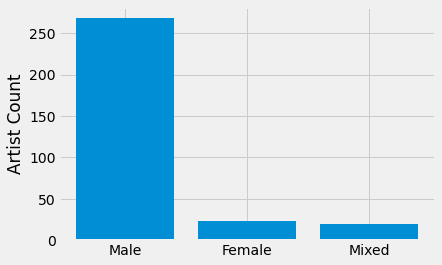

In [275]:
female_artists = ranking[ranking['gender'] == 'female']['ID'].count()
male_artists = ranking[ranking['gender'] == 'male']['ID'].count()
mixed_artists = ranking[ranking['gender'] == 'mixed']['ID'].count()

plt.bar(['Male','Female','Mixed'],[male_artists,female_artists,mixed_artists])
plt.ylabel('Artist Count')
plt.show()

### Which song was in the top spot of most people?

In [78]:
top_fav_songs = ranking.sort_values('n1',ascending=False)
top_fav_songs[['title','artist','year']].head(3)

,title,artist,year
0,Juicy,The Notorious B.I.G.,1994
1,Fight The Power,Public Enemy,1989
3,The Message,Grandmaster Flash & The Furious Five,1982


# The year of the most favourite rap song

In [276]:
years = ranking.groupby(['year'])['points'].sum().index.values
points = ranking.groupby(['year'])['points'].sum().values
year, point = [[x,y] for y, x in sorted(zip(points, years))][-1]
year

1994

## Most frequent favourite artist of all times

In [146]:
artists = ranking.groupby(['artist'])['points'].sum().index.values
points  = ranking.groupby(['artist'])['points'].sum().values
artist, point = [[x,y] for y, x in sorted(zip(points, artists))][-1]
print("Artist: {}".format(artist))
print("Points: {}".format(point))

Artist: The Notorious B.I.G.
Points: 162


## The most favourite rap era so far

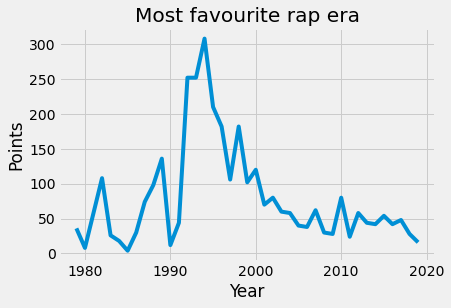

In [147]:
years = ranking.groupby(['year'])['points'].sum().index.values
points = ranking.groupby(['year'])['points'].sum().values
plt.plot(years, points)
plt.title("Most favourite rap era")
plt.xlabel('Year')
plt.ylabel('Points')
plt.show()

## The oldest *not so liked* song

In [220]:
least_fav = ranking.groupby(['artist']).sum()
least_fav = least_fav[least_fav['points'] == least_fav.points.min()]
oldest_not_fav_ID = least_fav.sort_values(['points','year'])['ID'][0]
ranking[ranking['ID'] == oldest_not_fav_ID][['title','artist','year','points']]

,title,artist,year,points
304,The Breaks,Kurtis Blow,1980,2


## The latest *not so liked* song

In [221]:
least_fav = ranking.groupby(['artist']).sum()
least_fav = least_fav[least_fav['points'] == least_fav.points.min()]
latest_not_fav_ID = least_fav.sort_values(['points','year'])['ID'][-1]
ranking[ranking['ID'] == latest_not_fav_ID][['title','artist','year','points']]

,title,artist,year,points
288,Mtaktak,Shabjdeed & Al Nather,2019,2


# Working with polls.csv

In [278]:
polls = polls[~polls.critic_country2.isna()]
polls.drop(columns = ['critic_country2'], inplace = True)
polls

,rank,title,artist,gender,year,critic_name,critic_rols,critic_country
200,1,Brenda’s Got A Baby,2Pac,male,1991,Polla Garmiany,Critic,Germany
201,2,U.N.I.T.Y.,Queen Latifah,female,1993,Polla Garmiany,Critic,Germany
202,3,The Story Of OJ,JAY-Z,male,2017,Polla Garmiany,Critic,Germany
203,4,Ms Jackson,OutKast,male,2000,Polla Garmiany,Critic,Germany
204,5,It Was A Good Day,Ice Cube,male,1992,Polla Garmiany,Critic,Germany


## Which country has the most critics

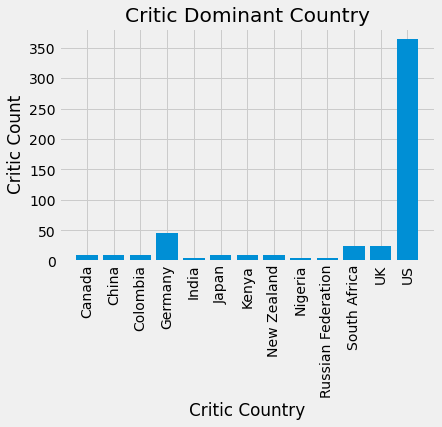

In [244]:
country_names = polls.groupby(['critic_country'])['rank'].count().index.values
critic_count = polls.groupby(['critic_country'])['rank'].count().values
plt.bar(country_names, critic_count)
plt.xticks(rotation = 90)
plt.title("Critic Dominant Country")
plt.xlabel("Critic Country")
plt.ylabel("Critic Count")
plt.show()

## Breakdown of critics roles. Note that I have specifically removed those critics whose role in the industry were of *critic*

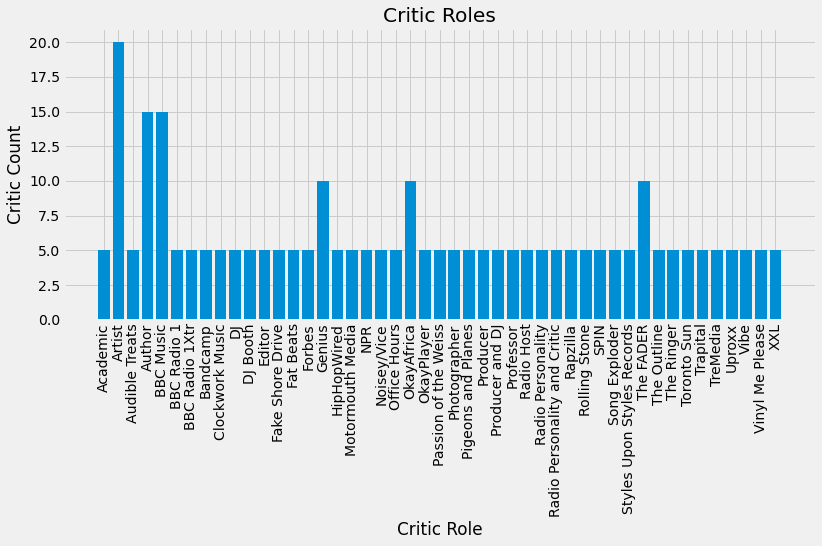

In [258]:
plt.figure(figsize=(12,5))

polls.critic_rols.unique()

polls2 = polls[polls['critic_rols'] != 'Critic']
critic_roles = polls2.groupby(['critic_rols'])['rank'].count().index.values
critic_count = polls2.groupby(['critic_rols'])['rank'].count().values
plt.bar(critic_roles, critic_count)
plt.xticks(rotation = 90)
plt.title("Critic Roles")
plt.xlabel("Critic Role")
plt.ylabel("Critic Count")
plt.show()

## Gender breakdown of critics

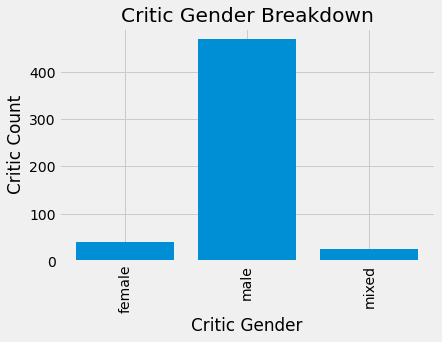

In [261]:
critic_gender = polls.groupby(['gender'])['rank'].count().index.values
critic_count = polls.groupby(['gender'])['rank'].count().values
plt.bar(critic_gender, critic_count)
plt.xticks(rotation = 90)
plt.title("Critic Gender Breakdown")
plt.xlabel("Critic Gender")
plt.ylabel("Critic Count")
plt.show()